In [1]:
import os
import glob

import cv2
import PIL
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.path as mpath 
import matplotlib.patches as mpatches 
import matplotlib.gridspec as gridspec

def showimg(img, title='', cmap='gray'):
    plt.imshow(img, cmap=cmap)
    plt.title(title+', ' + str(img.shape))
    plt.show()

In [2]:
def plotax_imgs(
                imgs: np.ndarray, 
                cols: int = 4,
                titles: list = None,
                colors: list = None,
                cmaps: list = None, 
                turnoffaxes: bool = True, 
                fsize: int = 8,
                tfsize: int = 8,
                saveplt: str = None,
                ylabels: dict = None
             ) -> bool:
    """Plots and Displays Multiple Images in RxC
       Created by Alem Fitwi, 29 July 2022
    """
    nimgs = len(imgs)
    cols = nimgs if nimgs < cols else cols
    ar = nimgs//cols
    rows = int(np.ceil(len(imgs)/cols))    
    k = np.zeros((imgs[0].shape), np.uint8)
    if rows*cols-nimgs>0:
        imgs.extend([k]*(rows*cols-nimgs))   
    nimgs = len(imgs)
    rows = int(np.ceil(nimgs/cols)) 
    row_list = list(range(0, nimgs, cols))
    
    if cmaps is None:
        cmaps = ['gray']*nimgs
    if titles is None:
        titles = ['Img']*nimgs 
    if ylabels is None:
        ylabels = {str(r):f'Label_{r//cols}' for r in row_list}
    
    plt.figure(figsize=(2*cols, rows*2), dpi=300)
    for i in range(nimgs):
        ax = plt.subplot(rows, cols, i+1)
        ax.imshow(imgs[i],cmap=cmaps[i])
        ax.set_title(titles[i], fontsize=fsize, color='red')
        ax.set_facecolor("red")
        if turnoffaxes:
            ax.set_xticks([])
            ax.set_yticks([])  
        else:
            ax.tick_params(axis='x', labelsize=tfsize)
            ax.tick_params(axis='y', labelsize=tfsize)
        ax.set_xlabel(f'(H, W) = {imgs[i].shape}', 
                   fontsize=fsize)
        if str(i) in list(ylabels.keys()):
            plt.ylabel(f'{ylabels[str(i)]}', 
                      rotation=0,
                      fontsize=fsize,
                      labelpad=20) 
            
    plt.subplots_adjust(wspace=0.3, hspace=0.1)
    plt.tight_layout(pad=0.01)
    if saveplt is not None:
        plt.savefig(saveplt, dpi=300, 
                bbox_inches='tight')
    plt.show()

 # Detection of Rectabgular Area
 - Contouring
 - Corner Detection
 - FFT and Contouring

In [26]:
class ROI:  
    # Line = 79 Chars
    # Comment Line = 72 Chars
    #--------------------------------------------------------------------------
    # Class Var
    #--------------------------------------------------------------------------
    
    
    #--------------------------------------------------------------------------
    # Rectangular Plot/Drawing
    #--------------------------------------------------------------------------
    @staticmethod
    def plot_rect(
                    img: np.ndarray,
                    brect: tuple,
                    color: str = 'red',
                    title: str = '',
                    cmap: str = 'gray'
                    ) -> bool:
        
        fig, ax = plt.subplots(1)
        fig.canvas.manager.set_window_title(f"Debug: {title}")
        ax.imshow(img, cmap=cmap)
        
        # Bounding Rectangle
        x, y, w, h = brect
        rect = mpatches.Rectangle((x,y), w, h, linewidth=1, edgecolor=color, 
                                 facecolor='none')
        ax.add_patch(rect)
        plt.show()
        
        return True
    
    #--------------------------------------------------------------------------
    # Scatter Plot
    #--------------------------------------------------------------------------
    @staticmethod
    def plot_scatters(
                    img: np.ndarray,
                    lst: list,
                    color: str = 'red',
                    title: str = '',
                    cmap: str = 'gray',
                    size: float = 2,
                    marker: str = 'o'
                    ) -> bool:
        
        xs, ys = list(zip(*lst))
        fig, ax = plt.subplots(1)
        fig.canvas.manager.set_window_title(f"Debug: {title}")
        ax.imshow(img, cmap=cmap)
        ax.scatter(xs, ys, s=size, c=color, marker= marker)
        plt.show()
        
        return True
    
    #--------------------------------------------------------------------------
    # Compute Averages of RGB Channels
    #--------------------------------------------------------------------------
    @staticmethod
    def calc_ch_avg():
        pass
    
    #--------------------------------------------------------------------------
    # Normalize Input Image
    #--------------------------------------------------------------------------
    @staticmethod
    def norm_img(
                    img: np.ndarray,
                    norm_type: str = 'CV_8UC1'
                    ) -> np.ndarray:
        nimg = None
        if img.max()<=255 and 'int' in str(img.dtype):
            return img
        if 'CV_8UC1' in norm_type:
            nimg = cv2.normalize(img, None, alpha=0, beta=255, 
                     norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1, mask=None)
         
        if 'CV_8UC1_LS' in norm_type:
            nimg = cv2.normalize(np.log10(1+img), None, alpha=0, beta=255, 
                     norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1, mask=None)
        if 'CV_32F' in norm_type:
            nimg = cv2.normalize(img, None, alpha=0, beta=1.0, 
                     norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
        
        return nimg
    
    #--------------------------------------------------------------------------
    # Crop Rectangular ROI
    #--------------------------------------------------------------------------
    @staticmethod
    def crop_rect_roi(
                        img: np.ndarray,
                        brect: tuple
                    ) -> np.ndarray:
        x, y, w, h = brect
        
        return img[y:y+h, x:x+w]
    
    

# Test

In [21]:
img = np.zeros((1200, 1600), np.uint8)
img[400:800, 600:1000] = 255

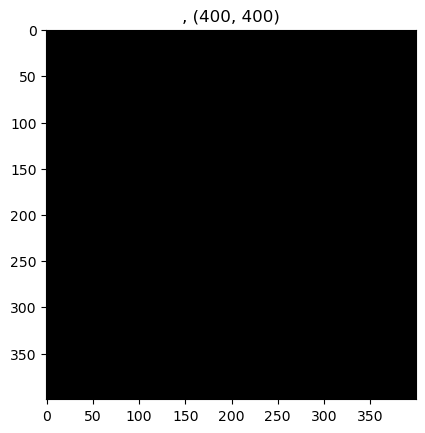

In [32]:
crop = ROI.crop_rect_roi(img.copy(), (600, 400, 400, 400))
showimg(crop)